In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import heapq
import cv2
# Wczytanie mapy z drogami
def load_map(file_path):
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

# Wizualizacja mapy z zaznaczonymi punktami
def plot_map_with_points(map_data, point1, point2):
    plt.imshow(map_data)
    plt.plot(point1[1], point1[0], 'ro', markersize=5, label='Point 1')
    plt.plot(point2[1], point2[0], 'ro', markersize=5, label='Point 2')
    plt.legend()
    plt.show()


# Wyznaczenie najkrótszej drogi między dwoma punktami
def make_graph(map_data):
    # Konwersja mapy na graf
    jasnosc =100
    graph = nx.Graph()
    height, width = map_data.shape[:2]
    print("wysokosc: ",height, " szerokosc: ",width)
    for row in range(height):
        for col in range(width):
            if map_data[row, col] > jasnosc:  # Odcinek drogi (jaśniejszy niż tło)
                graph.add_node((row, col))
                i = row;
                j=col;
                szerokosc=1;
                wysokosc=1;
                while( map_data[i,col]>jasnosc and i < height-1):
                  i = i+1
                  szerokosc =szerokosc+1

                i=row;

                while( map_data[i,col]> jasnosc and  i > 0):
                  i = i -1
                  szerokosc = szerokosc+1

                while( map_data[row,j]>jasnosc and j< width-1):
                  j= j + 1
                  wysokosc = wysokosc + 1

                j=col

                while( map_data[row,j]>jasnosc and j>0):
                  j= j -1
                  wysokosc = wysokosc + 1


                if row > 0 and map_data[row - 1, col] > jasnosc:
                    graph.add_edge((row, col), (row - 1, col), weight=1/wysokosc)
                if col > 0 and map_data[row, col - 1] >jasnosc:
                    graph.add_edge((row, col), (row, col - 1), weight=1/szerokosc)
                if row < height - 1 and map_data[row + 1, col] >jasnosc:
                    graph.add_edge((row, col), (row + 1, col), weight=1/wysokosc)
                if col < width - 1 and map_data[row, col + 1] >jasnosc:
                    graph.add_edge((row, col), (row, col + 1), weight=1/szerokosc)

                #chodzenie na ukos
                i=row
                j=col
                # kierunek \
                szer_k1=1

                while( map_data[i,j]>jasnosc and i < height -1 and j< width-1):
                  i = i+1
                  j = j+1
                  szer_k1 =szer_k1+1

                i=row
                j=col
                while( map_data[i,j]>jasnosc and i > 0 and j>0 ):
                  i = i-1
                  j = j-1
                  szer_k1 =szer_k1+1

                if row > 0 and col < width-1 and map_data[row - 1, col + 1] > jasnosc:
                    graph.add_edge((row, col), (row - 1, col + 1), weight=1/szer_k1)
                if col > 0 and row< height-1 and map_data[row + 1, col - 1] >jasnosc:
                    graph.add_edge((row, col), (row + 1, col - 1), weight=1/szer_k1)

                i=row
                j=col
                # kierunek /
                szer_k2=1

                while( map_data[i,j]>jasnosc and i > 0 and j< width-1):
                  i = i-1
                  j = j+1
                  szer_k2 =szer_k2+1

                i=row
                j=col
                while( map_data[i,j]>jasnosc and i < height-1 and j>0):
                  i = i+1
                  j = j-1
                  szer_k2 =szer_k2+1

                if row < height-1 and col< width-1 and map_data[row + 1, col+1] > jasnosc:
                    graph.add_edge((row, col), (row + 1, col + 1), weight=1/szer_k2)
                if col > 0 and row > 0 and map_data[row -1, col - 1] >jasnosc:
                    graph.add_edge((row, col), (row - 1, col - 1), weight=1/szer_k2)

    return graph


# Przykładowe użycie
map_data = load_map('map4.png')

graph = make_graph(map_data)


wysokosc:  788  szerokosc:  1138


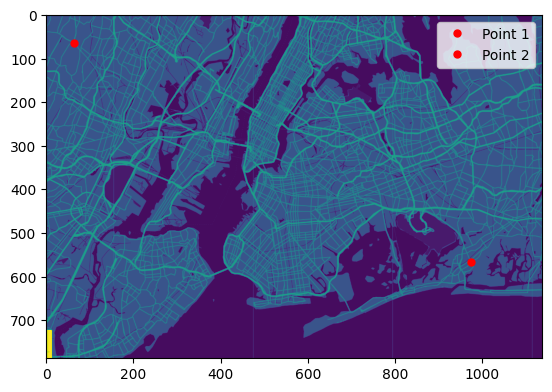

Najkrótsza droga: [(64, 63), (64, 64), (64, 65), (65, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 70), (71, 70), (72, 71), (73, 72), (74, 71), (74, 72), (75, 73), (76, 72), (77, 72), (78, 73), (79, 74), (80, 75), (81, 76), (81, 77), (82, 76), (82, 77), (82, 78), (81, 79), (81, 80), (80, 79), (79, 80), (78, 81), (78, 82), (79, 83), (80, 84), (81, 85), (82, 86), (82, 87), (83, 88), (82, 89), (83, 90), (84, 91), (85, 92), (86, 92), (87, 93), (86, 94), (87, 95), (88, 96), (89, 97), (89, 98), (90, 99), (91, 100), (92, 101), (93, 102), (94, 102), (93, 103), (94, 104), (93, 105), (93, 106), (93, 107), (93, 108), (93, 109), (93, 110), (93, 111), (93, 112), (93, 113), (94, 114), (95, 115), (94, 115), (93, 116), (93, 117), (93, 118), (93, 119), (94, 120), (93, 120), (94, 121), (93, 122), (94, 123), (95, 124), (95, 125), (95, 126), (94, 127), (95, 128), (95, 129), (95, 130), (95, 131), (96, 132), (97, 133), (96, 134), (97, 135), (98, 136), (98, 137), (98, 138), (98, 139), (98, 140

In [ ]:
point1 = ( 64,63)
point2 = (567,974)

# start_point = (40, 50)
# end_point = (570, 420)

# Wizualizacja mapy z zaznaczonymi punktami
plot_map_with_points(map_data, point1, point2)

# Wyszukiwanie najkrótszej drogi w grafie
path = nx.shortest_path(graph, point1, point2, weight='weight')
# Wyznaczenie najkrótszej drogi
print("Najkrótsza droga:", path)


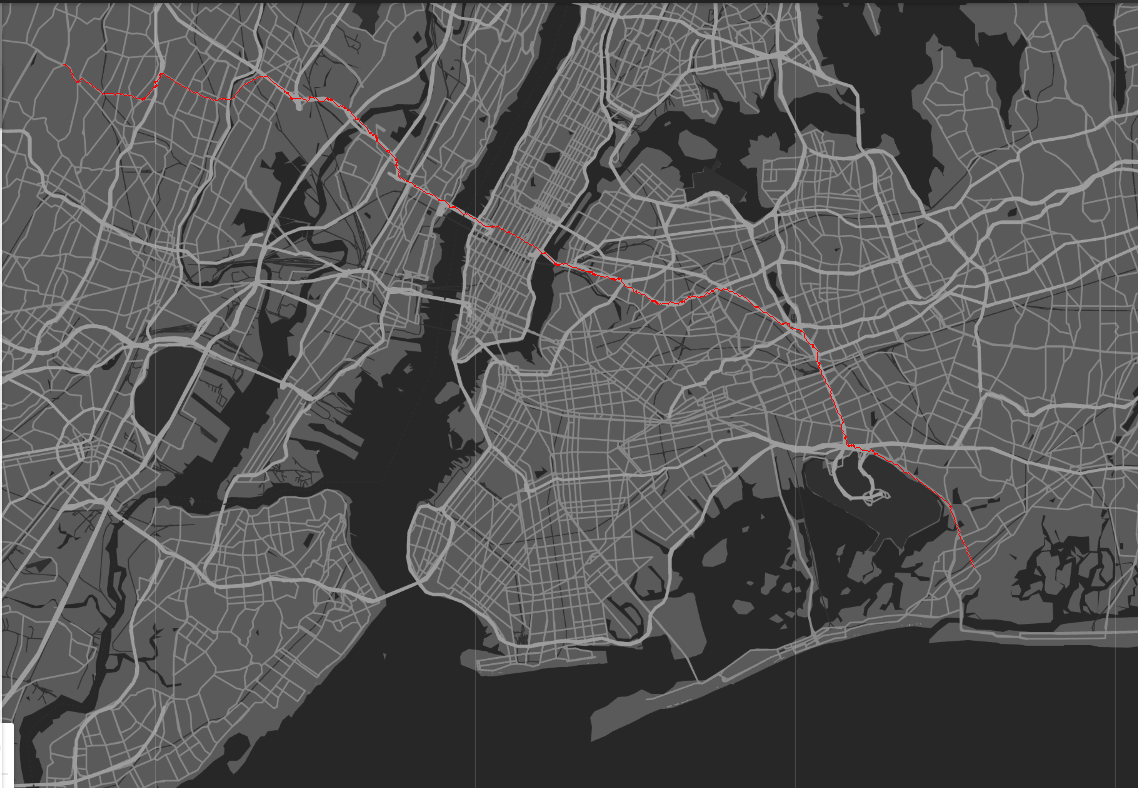

In [ ]:
from google.colab.patches import cv2_imshow
if path is None:
    print("No valid path found.")
else:
    # Convert the grayscale map image to RGB for visualization
    map_image_rgb = cv2.cvtColor(map_data, cv2.COLOR_GRAY2RGB)

    # Mark the shortest path on the map image
    for node in path:
        x, y = node
        map_image_rgb[x, y] = [0, 0, 255]  # Mark the path in blue

    # Display the map image with the shortest path
    cv2_imshow( map_image_rgb)